In [134]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [135]:
data = pd.read_csv('./relevant_data/wrangled_data.csv')

In [136]:
data.head()

,state,county,state_house_blue_perc,density_km,days_counted,case_count_28_days,death_count_28_days,confirmed_infection(%_of_pop),death_perc(%_of_case),avg_daily_case_increase(%_of_pop),...,percent_65_and_over,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural
0,Alabama,Autauga,22.86,35.436,45,61,3,0.122776,5.970149,0.002728,...,15.562670,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016,0.820225,51.448715,42.002162
1,Alabama,Baldwin,22.86,44.261,55,168,3,0.114120,2.403846,0.002075,...,20.443350,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337,0.543517,51.538377,42.279099
2,Alabama,Calhoun,22.86,75.572,51,93,3,0.103734,2.439024,0.002034,...,17.717476,20.850215,0.539916,0.964324,0.110258,3.910673,72.024992,0.991376,51.946586,33.696826
3,Alabama,Chambers,22.86,22.146,50,294,21,0.908958,6.752412,0.018179,...,19.521047,39.565670,0.306411,1.326789,0.044623,2.561357,55.231296,0.112938,52.125539,49.148034
4,Alabama,Cullman,22.86,42.252,49,58,0,0.077109,0.000000,0.001574,...,18.511062,1.205628,0.645958,0.672323,0.086287,4.433019,91.855421,0.578012,50.570456,73.239559


In [137]:
data.columns

Index(['state', 'county', 'state_house_blue_perc', 'density_km',
       'days_counted', 'case_count_28_days', 'death_count_28_days',
       'confirmed_infection(%_of_pop)', 'death_perc(%_of_case)',
       'avg_daily_case_increase(%_of_pop)', 'case_count_28_days(%_of_pop)',
       'death_count_28_days(%_of_case)', 'years_of_potential_life_lost_rate',
       'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured', 'primary_care_physicians_rate',
       'dentist_rate', 'mental_health_provider_rate',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_col

In [138]:
excluded_columns = [
    'state', 
    'county',  
    'days_counted', 
    'case_count_28_days',
    'death_count_28_days', 
    'confirmed_infection(%_of_pop)',
    'death_perc(%_of_case)', 
    'avg_daily_case_increase(%_of_pop)',
    'case_count_28_days(%_of_pop)', 
    'death_count_28_days(%_of_case)',
    'presence_of_water_violation',
    'state_house_blue_perc'
    
]

In [139]:
data_subset = data[excluded_columns]

In [140]:
data_subset.columns = [
    'state', 
    'county',  
    'days_counted', 
    'case_count_28_days',
    'death_count_28_days', 
    'confirmed_infection_perc',
    'death_perc', 
    'avg_daily_case_increase_perc',
    'case_count_28_days_perc', 
    'death_count_28_days_perc',
    'presence_of_water_violation',
    'state_house_blue_perc' 
]

In [141]:
main_data = data.drop(excluded_columns, axis=1)

In [142]:
main_data.columns

Index(['density_km', 'years_of_potential_life_lost_rate',
       'percent_fair_or_poor_health', 'percent_low_birthweight',
       'percent_smokers', 'percent_adults_with_obesity',
       'food_environment_index', 'percent_physically_inactive',
       'percent_with_access_to_exercise_opportunities',
       'percent_excessive_drinking',
       'percent_driving_deaths_with_alcohol_involvement', 'chlamydia_rate',
       'teen_birth_rate', 'percent_uninsured', 'primary_care_physicians_rate',
       'dentist_rate', 'mental_health_provider_rate',
       'preventable_hospitalization_rate', 'percent_with_annual_mammogram',
       'percent_vaccinated', 'high_school_graduation_rate',
       'percent_some_college', 'labor_force', 'percent_unemployed',
       'percent_children_in_poverty', '80th_percentile_income',
       '20th_percentile_income', 'percent_single_parent_households',
       'social_association_rate', 'injury_death_rate', 'average_daily_pm2_5',
       'percent_severe_housing_problems

In [143]:
chi_square_value, p_value = calculate_bartlett_sphericity(main_data)

In [144]:
chi_square_value, p_value

(119612.53864637563, 0.0)

In [145]:
kmo_all, kmo_model = calculate_kmo(main_data)

In [146]:
kmo_model

0.8743730129793247

In [147]:
main_data.shape

(1222, 65)

In [148]:
fa = FactorAnalyzer()
fa.set_params(n_factors=25, rotation='quartimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)

In [149]:
ev, _, _ = fa.get_factor_variance()

In [150]:
ev

array([19.05540921,  5.72655699,  3.83393039,  2.77955538,  2.4558132 ,
        2.25077943,  2.15930778,  1.86325884,  1.80404025,  1.39867849,
        1.14499578,  1.14431769,  1.00919706,  0.92247039,  0.78175721,
        0.67973821,  0.58660974,  0.5709993 ,  0.56043012,  0.53861954,
        0.49109671,  0.30703997,  0.28391211,  0.2417182 ,  0.21153735])

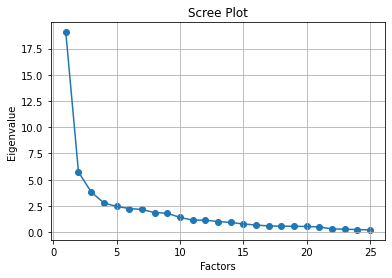

In [151]:
# Create scree plot using matplotlib
plt.scatter(range(1, 26), ev)
plt.plot(range(1, 26), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [152]:
fa = FactorAnalyzer()
fa.set_params(n_factors=11, rotation='quartimax')
fa.fit(main_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=11, rotation='quartimax',
               rotation_kwargs={}, use_smc=True)

In [153]:
fa.get_factor_variance()

(array([19.05534999,  5.93294247,  3.97703564,  2.86594318,  2.78787378,
         2.4645395 ,  2.24225865,  2.0054789 ,  1.80724963,  1.45614516,
         1.43084013]),
 array([0.29315923, 0.09127604, 0.06118516, 0.04409143, 0.04289037,
        0.03791599, 0.03449629, 0.03085352, 0.02780384, 0.02240223,
        0.02201293]),
 array([0.29315923, 0.38443527, 0.44562043, 0.48971187, 0.53260223,
        0.57051822, 0.60501451, 0.63586803, 0.66367187, 0.68607411,
        0.70808703]))

In [154]:
factor_df = pd.DataFrame(fa.loadings_)

In [155]:
factor_df.index = main_data.columns

In [156]:
factor_df.shape

(65, 11)

In [157]:
pd.set_option('display.max_rows', None)
factor_df

,0,1,2,3,4,5,6,7,8,9,10
density_km,-0.201810,0.316848,0.112563,0.094070,-0.033168,0.072778,0.119623,0.000343,0.139776,0.021067,0.628693
years_of_potential_life_lost_rate,0.909162,-0.104059,-0.089811,0.072221,0.017428,-0.076118,0.076017,0.113760,0.192229,0.012733,0.035208
percent_fair_or_poor_health,0.879346,0.131674,0.232278,-0.050418,0.128671,0.140102,0.044171,-0.040591,0.090600,0.045360,-0.010818
percent_low_birthweight,0.659065,0.133303,-0.095458,0.043497,0.111650,0.044825,0.482627,-0.106303,0.136459,0.011097,0.034327
percent_smokers,0.831677,-0.126224,-0.206318,-0.015110,-0.079622,0.115307,-0.072430,0.028458,-0.008526,0.120803,0.051498
percent_adults_with_obesity,0.668381,-0.319509,-0.024343,-0.210973,-0.112210,0.166630,0.114452,-0.090309,-0.054572,0.129611,-0.018231
food_environment_index,-0.762598,-0.289417,0.095599,-0.094058,-0.128952,-0.209448,-0.202637,-0.289878,0.086279,0.075518,0.127086
percent_physically_inactive,0.771037,-0.225933,-0.043551,-0.197171,0.063441,0.030219,0.028987,-0.148107,0.081390,0.123326,0.102279
percent_with_access_to_exercise_opportunities,-0.604009,0.312853,0.113378,0.314024,-0.136321,0.044981,0.033937,0.007038,-0.070071,0.178894,0.038668
percent_excessive_drinking,-0.624888,0.025184,-0.051057,-0.013937,-0.262293,0.072590,-0.058471,0.081242,-0.313794,0.031574,0.066443


Notes:

0. Poor well-being both physically and mentally
1. Shelter issue severity 
2. Lack of insurance
3. Availability to health/wellness facilities
4. Crime/Labour force
5. How young the population is
6. Overpopulation
7. Not sure - percent_female, percent_drive_alone_to_work, average_daily_pm2_5
8. Poor food index

In [158]:
main_data_transformed = pd.DataFrame(fa.transform(main_data))

In [159]:
data = pd.concat([data_subset, main_data_transformed], axis=1)

In [160]:
data.corr(method='pearson')['case_count_28_days_perc']

days_counted                    0.032628
case_count_28_days              0.510007
death_count_28_days             0.447949
confirmed_infection_perc        0.967783
death_perc                      0.103146
avg_daily_case_increase_perc    0.982148
case_count_28_days_perc         1.000000
death_count_28_days_perc        0.062564
state_house_blue_perc           0.046708
0                               0.042321
1                               0.150521
2                               0.038142
3                              -0.101921
4                              -0.043849
5                              -0.002209
6                               0.194800
7                               0.008341
8                               0.078596
9                               0.097287
10                              0.055939
Name: case_count_28_days_perc, dtype: float64

In [161]:
data.shape

(1222, 23)

In [162]:
blue_data = data[data['state_house_blue_perc'] >= 50]

In [163]:
red_data = data[data['state_house_blue_perc'] < 50]

In [164]:
blue_data.shape

(342, 23)

In [165]:
red_data.shape

(880, 23)

In [166]:
blue_data.corr(method='pearson')['case_count_28_days_perc']

days_counted                    0.025477
case_count_28_days              0.766306
death_count_28_days             0.718433
confirmed_infection_perc        0.959167
death_perc                      0.170919
avg_daily_case_increase_perc    0.979274
case_count_28_days_perc         1.000000
death_count_28_days_perc        0.119935
state_house_blue_perc          -0.029151
0                              -0.139119
1                               0.213266
2                               0.030337
3                              -0.098123
4                               0.122722
5                              -0.022175
6                               0.122216
7                              -0.064719
8                               0.217146
9                               0.315033
10                              0.202505
Name: case_count_28_days_perc, dtype: float64

In [167]:
red_data.corr(method='pearson')['case_count_28_days_perc']

days_counted                    0.004900
case_count_28_days              0.273273
death_count_28_days             0.200714
confirmed_infection_perc        0.980977
death_perc                      0.081375
avg_daily_case_increase_perc    0.984269
case_count_28_days_perc         1.000000
death_count_28_days_perc        0.045714
state_house_blue_perc          -0.029195
0                               0.166089
1                               0.097177
2                               0.020737
3                              -0.101972
4                              -0.082042
5                               0.027254
6                               0.225051
7                               0.035178
8                              -0.010236
9                              -0.001440
10                             -0.031007
Name: case_count_28_days_perc, dtype: float64

In [168]:
def assign_political_category(row):
    if row['state_house_blue_perc'] >= 50:
        return 'blue'
    else:
        return 'red'

In [169]:
data['political_affiation'] = data.apply(assign_political_category, axis=1)

In [170]:
data.columns

Index([                       'state',                       'county',
                       'days_counted',           'case_count_28_days',
                'death_count_28_days',     'confirmed_infection_perc',
                         'death_perc', 'avg_daily_case_increase_perc',
            'case_count_28_days_perc',     'death_count_28_days_perc',
        'presence_of_water_violation',        'state_house_blue_perc',
                                    0,                              1,
                                    2,                              3,
                                    4,                              5,
                                    6,                              7,
                                    8,                              9,
                                   10,          'political_affiation'],
      dtype='object')

In [171]:
data.columns = [              'state',                       'county',
                       'days_counted',           'case_count_28_days',
                'death_count_28_days',     'confirmed_infection_perc',
                         'death_perc', 'avg_daily_case_increase_perc',
            'case_count_28_days_perc',     'death_count_28_days_perc',
        'presence_of_water_violation',        'state_house_blue_perc',
                                  'a',                            'b',
                                  'c',                            'd',
                                  'e',                            'f',
                                  'g',                            'h',
                                  'x',                            'y',
                                  'z',          'political_affiation']

In [172]:
data.to_csv('./relevant_data/factorized_data.csv', index=False)

In [173]:
data.describe()

,days_counted,case_count_28_days,death_count_28_days,confirmed_infection_perc,death_perc,avg_daily_case_increase_perc,case_count_28_days_perc,death_count_28_days_perc,state_house_blue_perc,a,b,c,d,e,f,g,h,x,y,z
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03,1.222000e+03
mean,52.176759,513.615385,24.360065,0.278226,4.373437,0.005251,0.219438,4.145765,41.463846,-4.651671e-17,-9.826655e-16,-2.360723e-15,9.070758e-16,-1.476906e-15,-1.311190e-15,6.047172e-16,-1.248974e-14,-2.761930e-17,-2.110696e-15,4.622598e-16
std,7.016409,1845.534234,93.551790,0.433775,4.238003,0.007888,0.355983,4.233499,16.493838,1.000302e+00,1.010745e+00,1.117170e+00,9.492316e-01,1.312497e+00,1.112578e+00,1.010324e+00,1.745387e+00,9.739250e-01,9.618138e-01,1.378187e+00
min,45.000000,1.000000,0.000000,0.002676,0.000000,0.000050,0.000045,0.000000,10.000000,-2.982540e+00,-2.849902e+00,-3.694034e+00,-2.717384e+00,-4.923958e+00,-7.432406e+00,-3.388930e+00,-4.493544e+00,-3.299022e+00,-5.499698e+00,-3.655020e+00
25%,48.000000,34.000000,1.000000,0.069428,1.144499,0.001349,0.054807,0.690852,29.410000,-6.632703e-01,-7.216800e-01,-6.213744e-01,-6.799750e-01,-8.853274e-01,-6.301307e-01,-6.672743e-01,-1.195903e+00,-5.826501e-01,-5.631128e-01,-9.603194e-01
50%,50.000000,95.500000,3.000000,0.149529,3.448276,0.002776,0.111436,3.264422,41.300000,-2.275163e-03,-1.480782e-01,-1.908908e-01,-1.920879e-02,-1.373714e-01,6.831234e-02,-5.989040e-02,-4.040378e-02,-2.888535e-03,1.198153e-01,-3.963753e-02
75%,55.000000,294.000000,13.000000,0.294565,6.408111,0.005791,0.234868,6.060606,54.290000,6.719774e-01,5.505591e-01,3.747965e-01,5.850915e-01,7.607607e-01,7.492024e-01,5.567594e-01,1.102335e+00,5.569293e-01,6.544938e-01,9.118310e-01
max,108.000000,29180.000000,1396.000000,6.417150,33.333333,0.121078,5.759162,33.333333,85.000000,3.534134e+00,4.190942e+00,9.483793e+00,8.837792e+00,5.226798e+00,3.845061e+00,4.218551e+00,1.677773e+01,4.190847e+00,2.794444e+00,1.191483e+01
